# 🎯 Customer Segmentation Using K-Means Clustering
### Machine Learning Project – Supervised/Unsupervised Learning
**Student Name:** Vaishnavi S
**Register No:** 25BFT449294



##  Introduction
Customer segmentation helps businesses understand their customers by grouping them based on similar characteristics.
Using K-Means, we segment customers based on their Annual Income and Spending Score.


##  Problem Statement
To identify different types of customers in a mall using clustering, so marketing teams can tailor their strategies for each group.


##  Objective
- Segment customers using K-Means clustering.
- Analyze income & spending patterns.
- Provide insights for targeted marketing.


## Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


## Load Dataset

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Mall_Customers.csv")
df.head()


Saving Mall_Customers.csv to Mall_Customers (1).csv


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## Data Preprocessing

In [7]:
df.isnull().sum()

le = LabelEncoder()
df['Genre'] = df['Genre'].map({'Male': 1, 'Female': 0})


df.drop(['CustomerID'], axis=1, inplace=True)


## Feature Selection

In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## Elbow Method Plot

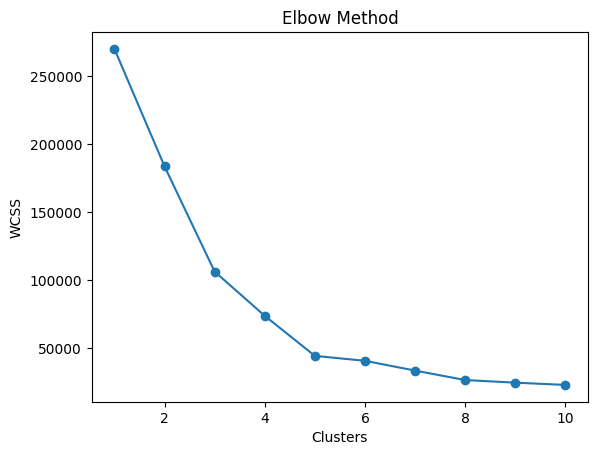

In [9]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()


## Apply K-Means

In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
df.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


## Visualization

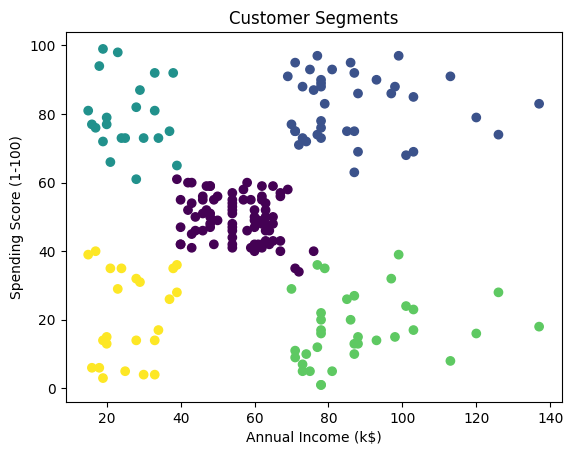

In [11]:
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=df['Cluster'])
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segments")
plt.show()


## Cluster Insights

### Cluster Insights
- **Cluster 0:** Low income, low spending  
- **Cluster 1:** Medium income, medium spending  
- **Cluster 2:** High income, high spending  
- **Cluster 3:** Low income, high spending  
- **Cluster 4:** High income, low spending  


## Conclusion


K-Means successfully segmented customers into 5 groups.
These insights help the mall design targeted marketing campaigns and improve customer experience.
